Clean and Analyze Employee Exit Surveys

we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, We will help the stakeholders want to know the following:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results for both surveys to answer the questions

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended

Cease Date: The year or month the person's employment ended

DETE Start Date: The year the person began employment with the DETE


Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey

Reason for ceasing employment: The reason why the person's employment ended

LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Lets explore both dataframes

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey['Gender'].value_counts()

Female    573
Male      225
Name: Gender, dtype: int64

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The dete has 822 rows and Data 56 columns with bool, int ,object and float data type
dete contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

dete contains many of the same columns, but the column names are different.

The dataset has numerous missing values
Aboriginal                             806
Torres Strait                          819
South Sea                              815
Disability                             799
NESB                                   790

With Torres Strait having the highest number

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey['Record ID'].value_counts()

6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

tafe has 702 rows and 72 columns with float, object types
Some of the missing values are recorded as - and NAN
tafe contains many of the same columns, but the column names are different.
tafe contains many columns that we don't need to complete our analysis.


Identify Missing Values and Drop Unnecessary Columns

We will start by fixing the missing values first

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Lets drop some columns from each dataframe that we wont use in our analysis to make the dataframes easier to work with

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

We have dropped the columns because they are not useful to our analysis. these columns are the same with already existing columns but they just have different names

Clean Column Names

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

dete_survey  ID
tafe_survey  Record ID	
Definition   An id used to identify the participant of the survey

dete_survey  SeparationType	
tafe_survey  Reason for ceasing employment	
Definition   The reason why the participant's employment ended

dete_survey  Cease Date	
tafe_survey  CESSATION YEAR	
Definition   The year or month the participant's employment ended

dete_survey  DETE Start Date		
Definition   The year the participant began employment with the DETE

tafe_survey  LengthofServiceOverall.Overall Length of Service at Institute(in years)	
Definition   The length of the person's employment (in years)

dete_survey  Age	
tafe_survey  CurrentAge. Current Age	
Definition   The age of the participant

dete_survey  Gender	
tafe_survey  Gender. What is your Gender?	
Definition   The gender of the participant


Because we eventually want to combine them, we'll have to standardize the column names.

We will do the following 
1. Make all the capitalization lowercase.
2. Remove any trailing whitespace from the end of the strings.
3. Replace spaces with underscores ('_').

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [14]:
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
renaming = {'Record ID','CESSATION YEAR','Reason for ceasing employment','Gender. What is your Gender?'
,'CurrentAge. Current Age', 'Employment Type. Employment Type','Classification. Classification', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)'}

In [16]:
tafe_survey_updated.rename(columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender'
,'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},inplace = True)

In [17]:
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


We made the changes above to make it easy to read column names. There were too long and difficult to read properly

Filter the Data

Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?


If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate

In [18]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
pattern = r"Resignation-"
dete_resignations = dete_survey_updated.loc[(dete_survey_updated['separationtype'].str.contains(pattern))]

In [21]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_resignations = tafe_survey_updated.loc[(tafe_survey_updated['separationtype'] == 'Resignation')]

In [23]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons Resignation-Other employer Resignation-Move overseas/interstate

Verify the Data


In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense

1. Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
2. Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

3. If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them

In [24]:
# clean the cease_date column in dete_resignations
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(\d{4})').astype(float)

<ipython-input-25-2e51cbe18804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(\d{4})').astype(float)


In [26]:
dete_resignations['cease_date'].sort_index(ascending = True).value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [27]:
dete_resignations['dete_start_date'].sort_index(ascending = True).value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [28]:
tafe_resignations['cease_date'].sort_index(ascending = True).value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

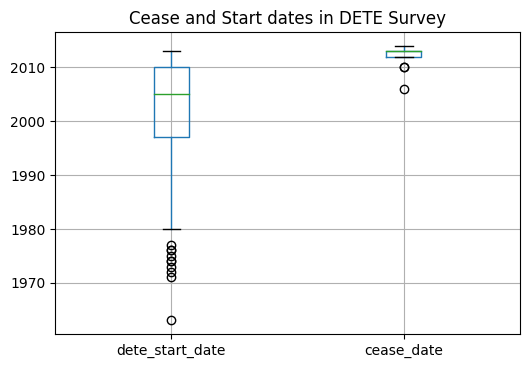

In [66]:
dete_resignations.boxplot(column = ['dete_start_date','cease_date'])
plt.title('Cease and Start dates in DETE Survey')
plt.show()

Below are my findings:
The years in both dataframes don't completely align.

The tafe_resignations dataframe contains some cease dates in 2009, but the dete_resignations dataframe does not.

The dete_resignations dataframe does not contain any start dates prior to 1940.

The tafe_resignations dataframe also contains many more cease dates in 2010 than the dete_resignations dataframe.

Since we aren't concerned with analyzing the results by year, we'll leave them as is

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [29]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'] 

<ipython-input-29-b2771289963a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


In [30]:
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

We have addded a new column called institute service
This column indicates the years of service that employees spent working for the institute. 
By creating a new column its easy to compare the start and end date in the dete_resignation dataframe

we'll identify any employees who resigned because they were dissatisfied.
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe

tafe_survey_updated:
2. Contributing Factors. Dissatisfaction
3. Contributing Factors. Job Dissatisfaction

dete_survey_updated:
5. job_dissatisfaction
6. dissatisfaction_with_the_department
7. physical_work_environment
8. lack_of_recognition
9. lack_of_job_security
10. work_location
11. employment_conditions
12. work_life_balance
workload
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column



In [31]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif  val == '-':
        return False
    else:
        return True
        
    

In [34]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)

<ipython-input-34-75f662285109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)


In [35]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                     'physical_work_environment','lack_of_recognition',
                                     'lack_of_job_security','work_location','employment_conditions',
                                     'work_life_balance','workload']].applymap(update_vals).any(axis=1,skipna=False)

<ipython-input-35-88f1c5890c6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',


In [36]:
dete_resignations_up =dete_resignations.copy(['job_dissatisfaction','dissatisfaction_with_the_department',
                                     'physical_work_environment','lack_of_recognition',
                                     'lack_of_job_security','work_location','employment_conditions',
                                     'work_life_balance','workload'])

In [37]:
tafe_resignations_up =tafe_resignations.copy(['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction'])

In [38]:
dete_resignations_up


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0,True
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0,True
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,True
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True


In [39]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,False
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False


The changes we made above is to ategorize employees as "dissatisfied" from each dataframe. changing the columns to true and false helps in categorizing with uniformity in the 2 datasets

Our end goal is to aggregate the data according to the institute_service

Lets distinguish the two dataframes first

In [40]:
dete_resignations_up['institute'] = 'DATE'

In [41]:
tafe_resignations_up['institute'] = 'TAFE'

In [42]:
#Combine the dataframes
combined = pd.concat([dete_resignations_up,tafe_resignations_up],axis = 0, ignore_index = True)

In [43]:
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,-,-,-,-,-,Other,-,1-2


In [44]:
# we still have some columns left in the dataframe that we don't need to complete our analysis

In [45]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [46]:
#updating the combined dataframe: dropping any columns with less than 500 non null values and making a copy
#of it to avoid SettingWithCopyWarning in the next steps

combined_updated = combined.dropna(thresh = 500,axis = 1).copy()

In [47]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,True,DATE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DATE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,True,DATE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DATE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,True,DATE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


We have added a new column called institute to distinguish between th two dataframes before we combine them.
there are columns that we dont need to complete the analysis that we droped . we have also used a threshold of less than 500 not null values to select the columns 

Clean the Service Column

institute_service column is tricky to clean because it currently contains values in a couple different forms:
To analyze the data, we'll convert these numbers into categories

We'll use the slightly modified definitions below:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

In [48]:
combined_updated['institute_service']

0        7
1       18
2        3
3       15
4        3
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object

In [49]:
#First, we'll extract the years of service from each value in the institute_service column

combined_updated['institute_service']= combined_updated['institute_service'].astype(str)

In [50]:
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('-',',').str.replace(' ',',').str.extract(r'([1-9][0-9]?)').astype(float)

In [51]:
combined_updated['institute_service'].tail(20)

631    1.0
632    3.0
633    1.0
634    1.0
635    1.0
636    1.0
637    3.0
638    1.0
639    5.0
640    5.0
641    1.0
642    NaN
643    3.0
644    1.0
645    NaN
646    5.0
647    1.0
648    NaN
649    5.0
650    3.0
Name: institute_service, dtype: float64

In [53]:
#Next, we'll map each value to one of the career stage definitions

def service_categories(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return "New"
    if (val >= 3) and (val <=6):
        return "Experienced"
    if (val > 6) and(val <11):
        return "Established"
    if val >= 11:
        return "Veteran"

In [55]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_categories)

In [56]:
combined_updated['service_cat']

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

The institute service column had different forms of service that were entered, which were difficult to analyse and compaare. 
We put them in different categories which makes it easier for analysis

Perform Initial Analysis

In [58]:
#confirm the number of TRue,False values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna =False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [59]:
#replace the missing values in the dissatisfied column with the value that occurs most frequently in this column
combined_updated.fillna(value=True,inplace=True)

In [60]:
pvt_table = round(combined_updated.pivot_table(index=['service_cat'],values= ['dissatisfied'])*100,0)

In [61]:
pvt_table

,dissatisfied
service_cat,
True,74.0
Established,77.0
Experienced,58.0
New,42.0
Veteran,81.0


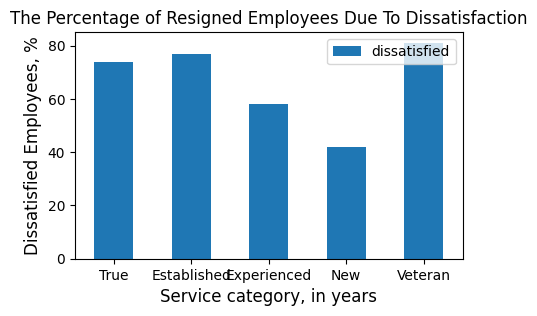

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
pvt_table.plot(kind = 'bar',rot = 0,figsize=(5,3),title ='The Percentage of Resigned Employees Due To Dissatisfaction')
plt.xlabel('Service category, in years', fontsize=12)
plt.ylabel('Dissatisfied Employees, %', fontsize=12)
plt.show()

The result of the bar chart observation shows that the employees with more than 7 years of experience, e.g. Established and Veterans, have the most percentage of resigning. This is reasonable because as New and Experienced employees, those who have less than 7 years of experience, are in the process of developing their careers at the insitutes.